In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [18]:
df = pd.read_csv('Amreli NRM data for model building.csv')
campaign = np.unique(df['campaign'])

for c in campaign:
    dfc = df[df['campaign']==c]
    i = dfc.index[0]
    df = df.drop(i)
    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)
df

,campaign,Heat number (life number),Total Heat Time (minutes),Scrap (MT),Sponge (MT),Hot Heel (MT),Alloys (MT),Input (MT),Final C%,Tapping Temperature (C),...,Previous Frequency,Previous Rating of the Furnace,Voltage,Frequency,Rating of the furnace (KW),Melt rate (MT/Hr),Efficiency (MT/KWH),Number of capacitors removed,Refractory lining before heating,Refractory lining after heating
0,1,2.0,135.0,11.0,23.531707,0,0.390,34.921707,0.204,1685.0,...,273.0,3728.0,3740.0,274.0,3740.0,13.540444,0.001500,0.0,6.687037,6.624074
1,1,3.0,125.0,12.0,19.678049,0,0.394,32.072049,0.203,1633.0,...,274.0,3740.0,3731.0,275.0,3731.0,13.579200,0.001582,0.0,6.624074,6.561111
2,1,4.0,110.0,12.0,16.956098,0,0.450,29.406098,0.192,1686.0,...,275.0,3731.0,3764.0,270.0,3764.0,14.244000,0.001628,0.0,6.561111,6.498148
3,1,5.0,115.0,13.0,17.032927,0,0.495,30.527927,0.196,1689.0,...,270.0,3764.0,3756.0,274.0,3756.0,14.192348,0.001568,0.0,6.498148,6.435185
4,1,6.0,105.0,15.0,16.000000,0,0.470,31.470000,0.194,1686.0,...,274.0,3756.0,3675.0,275.0,3675.0,16.165714,0.001669,0.0,6.435185,6.372222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,9,59.0,130.0,0.0,34.835366,0,0.635,35.470366,0.249,1679.0,...,314.0,3403.0,3366.0,362.0,3366.0,13.476923,0.001602,8.0,4.141535,4.096561
436,9,60.0,110.0,0.0,31.128049,0,0.585,31.713049,0.236,1652.0,...,362.0,3366.0,3498.0,328.0,3498.0,14.241818,0.001685,6.0,4.096561,4.051588
437,9,61.0,105.0,0.0,30.079268,0,0.365,30.444268,0.212,1650.0,...,328.0,3498.0,3428.0,351.0,3428.0,14.302857,0.001637,8.0,4.051588,4.006614
438,9,62.0,145.0,0.0,37.487805,0,0.710,38.197805,0.226,1701.0,...,351.0,3428.0,3210.0,368.0,3210.0,13.013793,0.001575,8.0,4.006614,3.961641


In [24]:
X_train

array([[  11.        ,   23.53170732,    0.        , ...,    6.68703704,
           0.        , 1685.        ],
       [  12.        ,   19.67804878,    0.        , ...,    6.62407409,
           0.        , 1633.        ],
       [  12.        ,   16.95609756,    0.        , ...,    6.56111113,
           0.        , 1686.        ],
       ...,
       [   0.        ,   31.91463415,    0.        , ...,    4.07704434,
           4.        , 1652.        ],
       [   0.        ,   31.98780488,    0.        , ...,    4.02358523,
           6.        , 1667.        ],
       [   0.        ,   36.67073171,    0.        , ...,    3.97012611,
           8.        , 1685.        ]])

In [19]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage','Previous Frequency','Refractory lining before heating','Number of capacitors removed','Tapping Temperature (C)']
output_columns = ['Voltage','Frequency','Refractory lining after heating']

X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values
y_s1 = y_train
y_s2 = y_test
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)


lr = LinearRegression()
lr.fit(normalized_X_train, normalized_y_train)
y_pred_train1 = lr.predict(normalized_X_train)
y_pred_test1 = lr.predict(normalized_X_test)

y_pred_train = scaler2.inverse_transform(y_pred_train1)
y_pred_test = scaler2.inverse_transform(y_pred_test1)

for i in range(3):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_s1[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_s2[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_s2[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_s1[:,i]))/np.sum(np.square(y_s1[:,i]-np.mean(y_s1[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_s2[:,i]))/np.sum(np.square(y_s2[:,i]-np.mean(y_s2[:,i])))*100))

for i in range(lr.coef_.shape[0]):
    for j in range(lr.coef_.shape[1]):
        print("Weight of {} on {} is {}".format(input_columns[j], output_columns[i],lr.coef_[i][j]))
    print('\n')

Voltage
Train score is 5614.912564840326
Test score is 5177.624087504594
R2 score is 0.8475987078621732
Train NMSE score is 20.502708040232857
Test NMSE score is 15.240129213782676
Frequency
Train score is 25.42120487442551
Test score is 33.114622275422434
R2 score is 0.9585916711573991
Train NMSE score is 3.1171933752777385
Test NMSE score is 4.140832884260097
Refractory lining after heating
Train score is 5.448473965188417e-05
Test score is 0.0001564492582216117
R2 score is 0.9997583429178197
Train NMSE score is 0.00850985530124093
Test NMSE score is 0.024165708218024228
Weight of Scrap (MT) on Voltage is -0.17019229228780974
Weight of Sponge (MT) on Voltage is -0.1529182783483264
Weight of Hot Heel (MT) on Voltage is 0.0
Weight of Alloys (MT) on Voltage is -0.06733303279474571
Weight of Previous Voltage on Voltage is 0.6510288448012123
Weight of Previous Frequency on Voltage is -0.18850508125743995
Weight of Refractory lining before heating on Voltage is 0.23961866663148984
Weight o

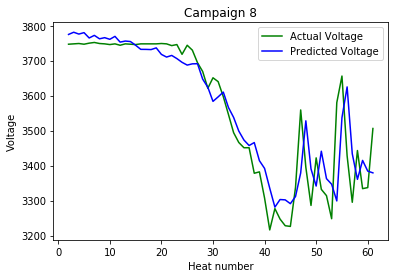

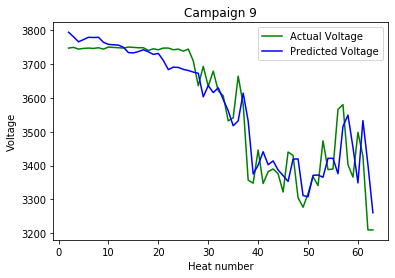

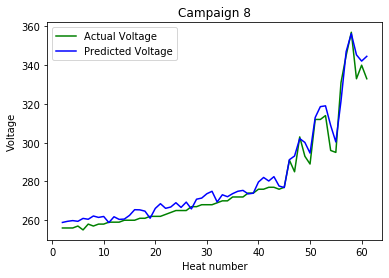

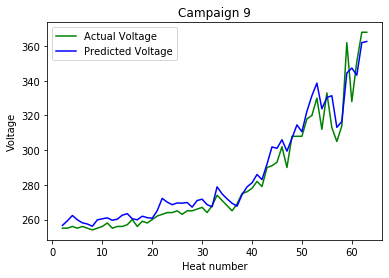

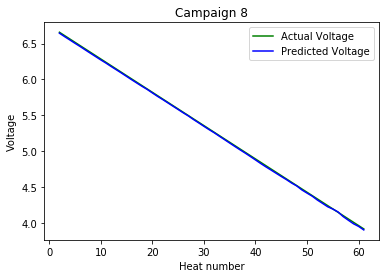

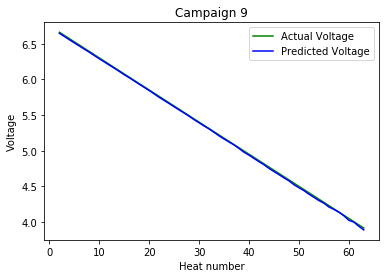

In [20]:
for i in range(3):
    plt.plot(range(2,62),y_s2[:60,i],c='g');
    plt.plot(range(2,62),y_pred_test[:60,i],c='b');
    plt.xlabel('Heat number')
    plt.ylabel('Voltage')
    plt.title('Campaign 8')
    plt.legend(['Actual Voltage','Predicted Voltage'])
    plt.show()
    plt.plot(range(2,64),y_s2[60:,i],c='g');
    plt.plot(range(2,64),y_pred_test[60:,i],c='b');
    plt.xlabel('Heat number')
    plt.ylabel('Voltage')
    plt.legend(['Actual Voltage','Predicted Voltage'])
    plt.title('Campaign 9')
    plt.show()

In [22]:
import pickle
pickle.dump(lr, open('C:/Users/DSNikhil/Downloads/Project work/Data/lin_model.pkl', 'wb'))
pickle.dump(scaler1, open('scaler_input.pkl', 'wb'))
pickle.dump(scaler2, open('scaler_output.pkl', 'wb'))